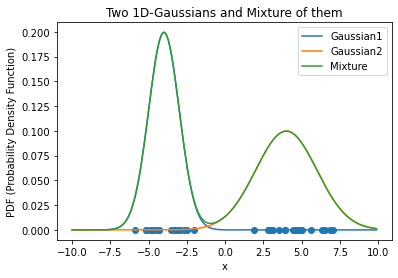

In [1]:
#######################################################
# Two 1D-Gaussians and mixture of them
#======================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# gaussian1
mu1 = -4
sigma1 = 1

# gaussian2
mu2 = 4.0
sigma2 = 2

# Generate random points
n_points = 20
points1 = np.random.normal(mu1, sigma1, n_points) # ~ N(mu1, sigma1**2)
points2 = np.random.normal(mu2, sigma2, n_points) # ~ N(mu2, sigma2**2)

# Combine the points into a single array
points = np.concatenate([points1, points2])

# Plot the points and PDFs
fig, ax = plt.subplots()
ax.scatter(points, len(points)*[0])
x = np.arange(-10, 10, 0.1)
gaussian1 = norm.pdf(x, mu1, sigma1) * 0.5
gaussian2 = norm.pdf(x, mu2, sigma2) * 0.5
ax.plot(x, gaussian1, label='Gaussian1')
ax.plot(x, gaussian2, label='Gaussian2')
ax.plot(x, (gaussian1 + gaussian2), label='Mixture')
ax.set_xlabel('x')
ax.set_ylabel('PDF (Probability Density Function)')
ax.set_title('Two 1D-Gaussians and Mixture of them')
ax.legend()


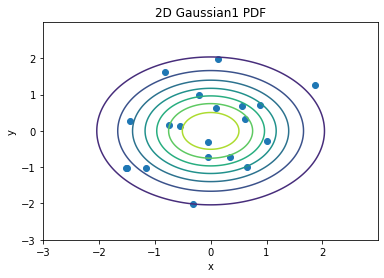

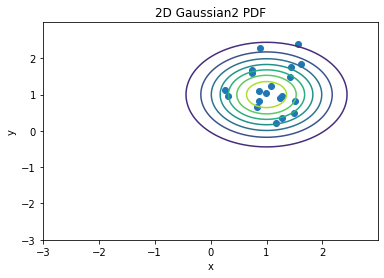

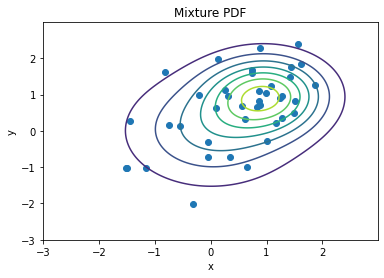

In [2]:
#######################################################
# Plot two 2D-Gaussians and mixture of them as a contour plot
#======================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 2D-Gaussian1
mu1 = [0, 0]
cov1 = [[1, 0], [0, 1]]

# 2D-Gaussian2
mu2 = [1, 1]
cov2 = [[0.5, 0], [0, 0.5]]

# Create grid of points to evaluate PDF
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Generate random points
n_points = 20
points1 = np.random.multivariate_normal(mu1, cov1, n_points) # ~ N(mu1, cov1)
points2 = np.random.multivariate_normal(mu2, cov2, n_points) # ~ N(mu2, cov2)

# Combine the points into a single array
points = np.concatenate([points1, points2])

# Create multivariate normal object and evaluate PDF
rv = multivariate_normal(mu1, cov1)
pdf1 = rv.pdf(pos) * 0.5 # np.ndarray
rv = multivariate_normal(mu2, cov2)
pdf2 = rv.pdf(pos) * 0.5 # np.ndarray
mixture = pdf1 + pdf2

# Plot each PDF as a contour plot
fig1, ax1 = plt.subplots()
ax1.contour(x, y, pdf1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('2D Gaussian1 PDF')

fig2, ax2 = plt.subplots()
ax2.contour(x, y, pdf2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('2D Gaussian2 PDF')

fig3, ax3 = plt.subplots()
ax3.contour(x, y, mixture)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Mixture PDF')

# plot sample points
x_p1, y_p1 = points1.T
x_p2, y_p2 = points2.T
x_p, y_p = points.T
ax1.scatter(x_p1, y_p1)
ax2.scatter(x_p2, y_p2)
ax3.scatter(x_p, y_p)

plt.show()

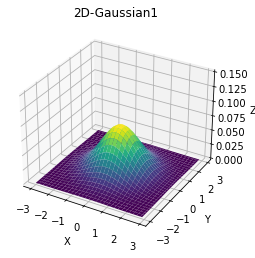

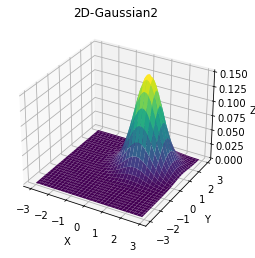

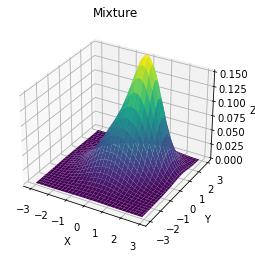

In [3]:
#######################################################
# Plot two 2D-Gaussians and mixture of them in 3D
#======================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# 2D-Gaussian1
mu1 = np.array([0, 0])
cov1 = np.array([[1, 0], [0, 1]])

# 2D-Gaussian2
mu2 = np.array([1, 1])
cov2 = np.array([[0.5, 0], [0, 0.5]])

# Create a 2D grid of points
x, y = np.mgrid[-3:3:.1, -3:3:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

# Evaluate the Gaussian PDF at each point on the grid
z1 = multivariate_normal.pdf(pos, mean=mu1, cov=cov1) * 0.5
z2 = multivariate_normal.pdf(pos, mean=mu2, cov=cov2) * 0.5
mixture = z1 + z2

# Create 3D plots
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')

# plot PDFs
ax1.plot_surface(x, y, z1, cmap='viridis', label='Gaussian1')
ax2.plot_surface(x, y, z2, cmap='viridis', label='Gaussian2')
ax3.plot_surface(x, y, mixture, cmap='viridis', label='Mixture')

# Set the labels for the axes
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('2D-Gaussian1')
ax1.set_zlim(0, 0.15) 

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('2D-Gaussian2')
ax2.set_zlim(0, 0.15) 

ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Mixture')
ax3.set_zlim(0, 0.15) 

# Show the plot
plt.show()